# CarDekho Price Prediction

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Cardekho.csv")

data 

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [5]:
# To check number of rows and columns
data.shape

(15411, 14)

In [6]:
# summary statistics for the data
data.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [8]:
''' weather data is clean or not

1.Null values
2.Duplicates
3.Wrong Data
'''

data['car_name'].nunique()

121

In [7]:
# which car is being sold the most on the platform?

data['car_name'].value_counts(normalize = True)*100

car_name
Hyundai i20              5.878918
Maruti Swift Dzire       5.775096
Maruti Swift             5.067809
Maruti Alto              5.048342
Honda City               4.912076
                           ...   
Mercedes-AMG C           0.006489
Rolls-Royce Ghost        0.006489
Maserati Quattroporte    0.006489
Isuzu MUX                0.006489
Force Gurkha             0.006489
Name: proportion, Length: 121, dtype: float64

<Axes: xlabel='selling_price', ylabel='Density'>

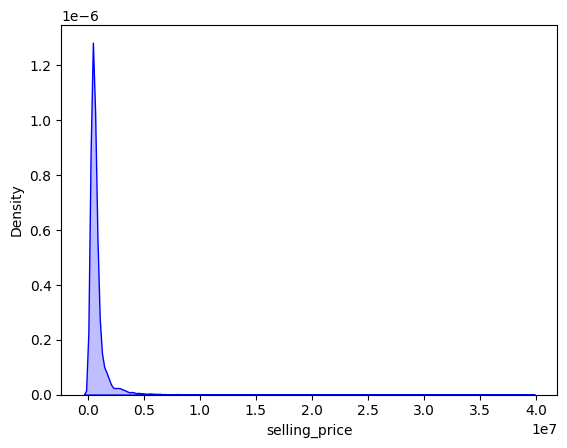

In [9]:
# Exploratory Data Analysis

# 1.univariate analysis:

sns.kdeplot(x = data['selling_price'], fill = True, color = 'b')



<Axes: xlabel='vehicle_age', ylabel='selling_price'>

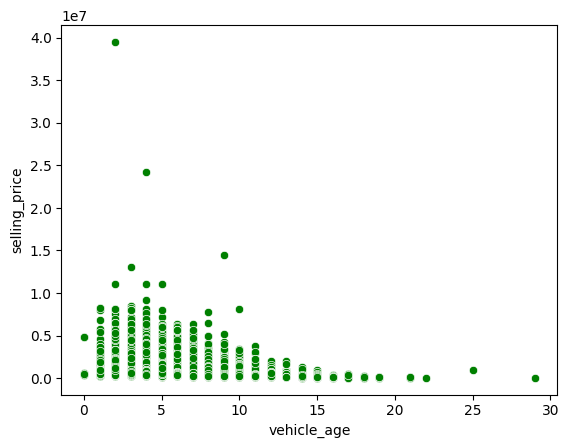

In [13]:
# 2.Bivariate analysis - To find the correlation between two variables

# usually 1 of them is the target variable 

sns.scatterplot(data = data, x = 'vehicle_age', y = 'selling_price', color = 'g')

As the vehicle_age increases, the selling_price of the car decreases

<Axes: xlabel='mileage', ylabel='selling_price'>

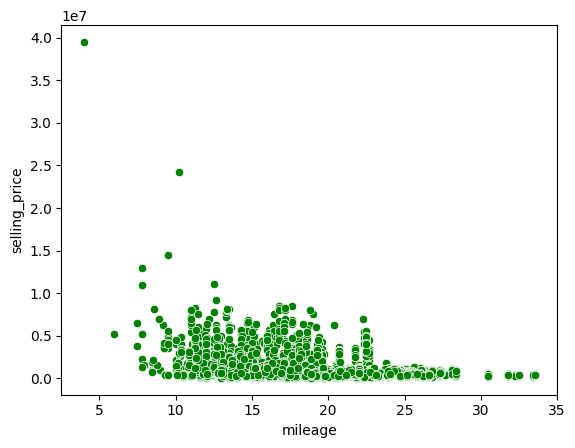

In [14]:
sns.scatterplot(data = data, x = 'mileage', y = 'selling_price', color = 'g')

As the mileage decreases, the selling_price of the car increases

<Axes: xlabel='km_driven', ylabel='selling_price'>

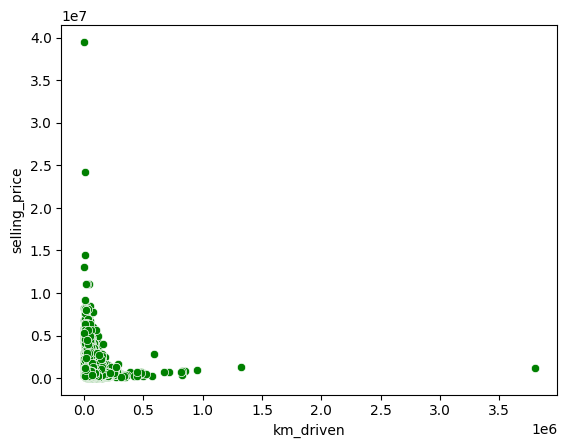

In [19]:
sns.scatterplot(data = data, x = 'km_driven', y = 'selling_price', color = 'g')

As the km_driven increases, the selling_price of the car decreases

<Axes: xlabel='engine', ylabel='selling_price'>

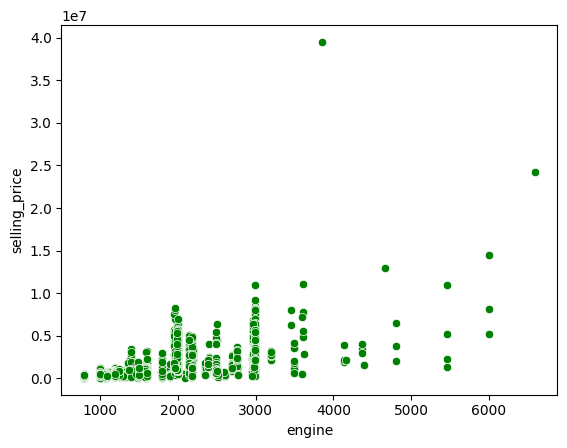

In [20]:
sns.scatterplot(data = data, x = 'engine', y = 'selling_price', color = 'g')

As the engine size increases, the selling_price of the car increases

<Axes: xlabel='max_power', ylabel='selling_price'>

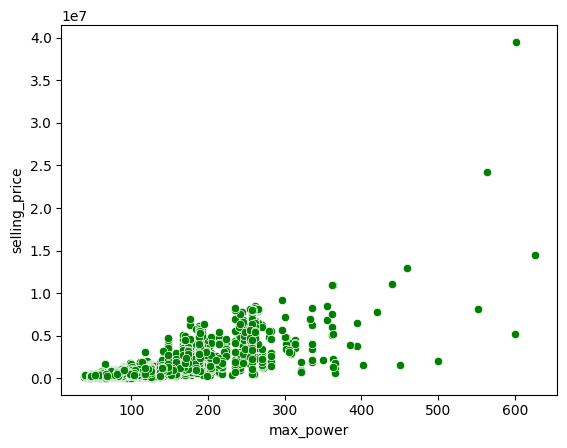

In [21]:
sns.scatterplot(data = data, x = 'max_power', y = 'selling_price', color = 'g')

As the max_power increases, the selling_price of the car increases

<Axes: xlabel='seats', ylabel='selling_price'>

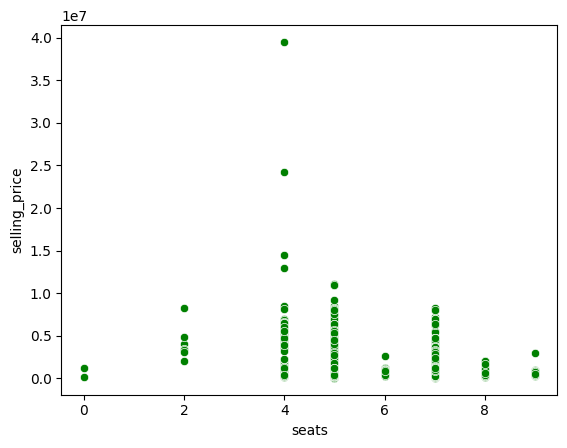

In [22]:
sns.scatterplot(data = data, x = 'seats', y = 'selling_price', color = 'g')

When the number of seats increases, the selling price does not consistently increase or decrease. Instead,
price variation is mostly driven by vehicle brand, model, and features rather than just the number of seats.

In [27]:
# 3.Multivariate analysis
numerical_variables = ['vehicle_age',
'km_driven',
'mileage',
'engine',
'max_power',
'seats',
'selling_price']

<Axes: >

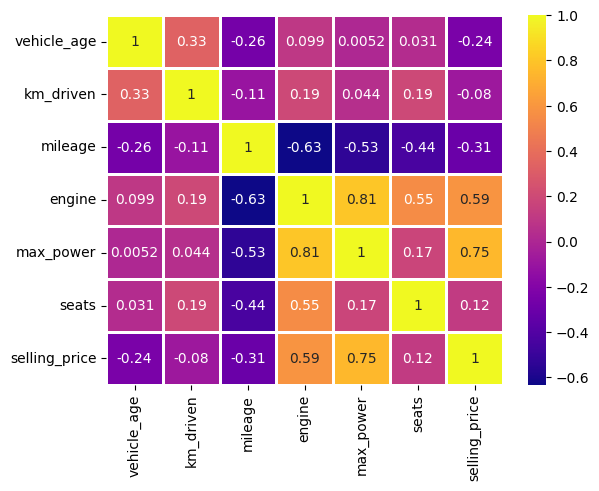

In [28]:
sns.heatmap(data = data[numerical_variables].corr(), annot = True, cmap = 'plasma', linewidth = 2)

What are the insights from this:

1.max power and Engine are highly correlated
2.max power, Engine impact selling price positively

In [9]:
# Find the most sold car model
most_sold_model = data["model"].value_counts().idxmax()
most_sold_count = data["model"].value_counts().max()

print(f"The most sold car model is: {most_sold_model} with {most_sold_count} listings.")


The most sold car model is: i20 with 906 listings.


In [10]:
# Find the most preferred fuel type
most_preferred_fuel = data["fuel_type"].value_counts().idxmax()
most_preferred_fuel_count = data["fuel_type"].value_counts().max()

print(f"The most preferred fuel type is: {most_preferred_fuel} with {most_preferred_fuel_count} listings.")


The most preferred fuel type is: Petrol with 7643 listings.


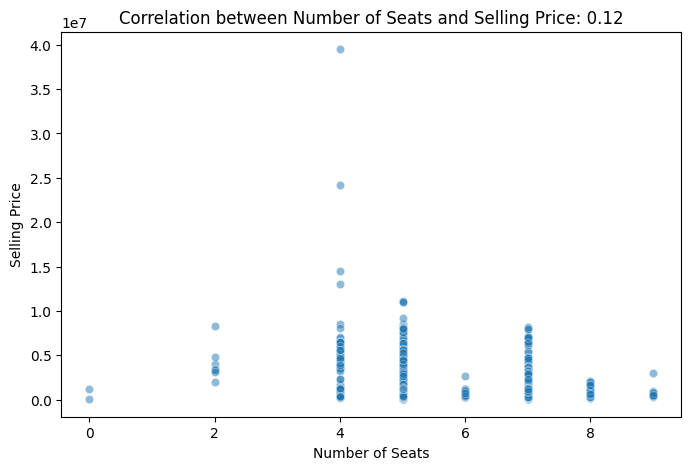

Correlation between number of seats and selling price: 0.12


In [12]:
#3.Do you think price should increase as the number of seats increase
# Calculate the correlation between seats and selling price
correlation = data["seats"].corr(data["selling_price"])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["seats"], y=data["selling_price"], alpha=0.5)
plt.xlabel("Number of Seats")
plt.ylabel("Selling Price")
plt.title(f"Correlation between Number of Seats and Selling Price: {correlation:.2f}")
plt.show()

# Print the correlation value
print(f"Correlation between number of seats and selling price: {correlation:.2f}")

When the number of seats increases, the selling price does not consistently increase or decrease. Instead,
price variation is mostly driven by vehicle brand, model, and features rather than just the number of seats.


In [13]:
''' Feature Engineering
1.we remove un-neccesary columns 

car name 
Brand name
model
seller_type'''

model_data = data.copy()
model_data.drop(labels = ['car_name', 'brand',  'model', 'seller_type'], axis = 1, inplace = True)

model_data.head()

,Unnamed: 0,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000


In [14]:
# 2.we convert categorical columns into numerical by dummies

model_data = pd.get_dummies(model_data,dtype = float)
model_data

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,19540,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,19541,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,19542,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# 3. We remove the target variable
model_data.drop('selling_price', axis = 1, inplace = True)

model_data

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,9,120000,19.70,796,46.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5,20000,18.90,1197,82.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,11,60000,17.00,1197,80.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,9,37000,20.92,998,67.10,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,6,30000,22.77,1498,98.59,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086,68.05,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,19540,2,18000,17.50,1373,91.10,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,19541,6,67000,21.14,1498,103.52,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,19542,5,3800000,16.00,2179,140.00,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [23]:
# Defining the target variable and independent variable
Y = data['selling_price']

x

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,9,120000,19.70,796,46.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5,20000,18.90,1197,82.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,11,60000,17.00,1197,80.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,9,37000,20.92,998,67.10,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,6,30000,22.77,1498,98.59,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086,68.05,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,19540,2,18000,17.50,1373,91.10,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,19541,6,67000,21.14,1498,103.52,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,19542,5,3800000,16.00,2179,140.00,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
x = data.drop(labels =['car_name', 'brand', 'model', 'seller_type', 'selling_price'], axis = 1)
x
x = pd.get_dummies(x,dtype = float)
x

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,9,120000,19.70,796,46.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5,20000,18.90,1197,82.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,11,60000,17.00,1197,80.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,9,37000,20.92,998,67.10,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,6,30000,22.77,1498,98.59,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086,68.05,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,19540,2,18000,17.50,1373,91.10,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,19541,6,67000,21.14,1498,103.52,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,19542,5,3800000,16.00,2179,140.00,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
#Traib/Test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2)

print(y_train)
print(y_test)

7130      325000
1010      239000
12741     725000
14531     725000
14160     299000
          ...   
10809     500000
11907     350000
12022     475000
11189     931000
10430    3200000
Name: selling_price, Length: 12328, dtype: int64
1687      589000
13231     200000
5994     1580000
2458     4800000
175       700000
          ...   
10691     310000
3718      275000
11090     450000
2932      995000
11129     700000
Name: selling_price, Length: 3083, dtype: int64


In [19]:
#Building model

#Linear regression

from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(x_train,y_train)
pred = regressor.predict(x_test)

pred

array([ 437953.79714996,  108723.77705884, 1574759.00546124, ...,
        557671.17062854,  891533.39131553,  660229.76836643],
      shape=(3083,))